# Introduction

Here I'm implementing double Q learning 

https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0


### Setup

In [90]:
import random
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
%matplotlib inline


class doubleQagent:
    def __init__(self, num_states, num_actions):
        
        self.num_states = num_states
        self.num_actions = num_actions
        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.Q = self._makeQtable()
        self.QA = self._makeQtable()
        self.QB = self._makeQtable()
        self.epsilon_decay = 0.99

        
    def _makeQtable(self):
        table = np.zeros((self.num_states, self.num_actions))
        return table


    def act_doubleQ(self, state):
        
        #Epsilon greedy
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.num_actions)
        else:
            QAs = self.QA[state]
            QBs = self.QB[state]
            Qs_average = 0.5*( QAs + QBs )
            action = np.argmax(Qs_average)
            return action
        
        
    def act(self,state):
        
        #Epsilon greedy
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.num_actions)
        else:
            Qs = self.Q[state]
            action = np.argmax(Qs)
            return action  
        
        
    def learn(self,state,action,reward,next_state):
        
        #Update Q table
        Q_next = self.Q[next_state]
        update = reward + self.gamma*max(Q_next) - self.Q[state,action]
        self.Q[state,action] = self.Q[state,action] + self.alpha*update

        
    def learn_doubleQ(self,state,action,reward,next_state):

        #Decide to update either A or B
        choice = np.random.choice([0,1])  #0 = A, 1 = B
        if choice == 0:
            a_star = np.argmax(self.QA[next_state])
            update = reward + self.gamma*self.QB[next_state,a_star] - self.QA[state,action]
            self.QA[state,action] = self.QA[state,action] + self.alpha*update
        else:
            b_star = np.argmax(self.QB[next_state])
            update = reward + self.gamma*self.QA[next_state,b_star] - self.QB[state,action]
            self.QB[state,action] = self.QB[state,action] + self.alpha*update  

### Double Q agent

In [105]:
#Environment
env = gym.make('FrozenLake-v0')
env.reset()
num_states = env.observation_space.n
num_actions = env.action_space.n  
reward_list = []


#Agent
num_episodes = 10**5
agent = doubleQagent(num_states, num_actions)
agent.gamma = 0.95
agent.alpha = 0.8
agent.epsilon = 0.5
agent.epsilon_decay = 0.99
agent.epsilon_min = 0.05

rList = []
for i in range(num_episodes):
    
    #Reset environment and get first new observation
    state = env.reset()
    total_reward = 0
    done = False
    step = 0
    
    #The Q-Table learning algorithm
    while step < 99:
        step+=1
        action = agent.act_doubleQ(state)
        next_state,reward,done,_ = env.step(action)
        agent.learn_doubleQ(state,action,reward,next_state)
        total_reward += reward
        state = next_state
        if done == True:
            break
    rList.append(total_reward)
    #Freeze the greed
    if agent.epsilon > agent.epsilon_min:
        agent.epsilon *= agent.epsilon_decay

print "Score over time: " +  str(sum(rList) / num_episodes)

Score over time: 0.06625


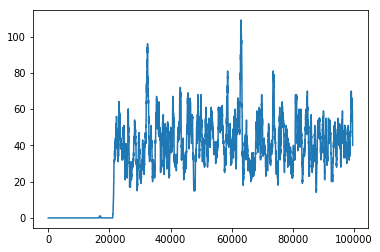

In [114]:
x,N = rList, 500
plt.plot(np.convolve(x, np.ones((N,)), mode='valid'))

NameError: name 'R' is not defined

### Single agent

In [115]:
#Environment
env = gym.make('FrozenLake-v0')
env.reset()
num_states = env.observation_space.n
num_actions = env.action_space.n  
reward_list = []


#Agent
num_episodes = 50000
agent = doubleQagent(num_states, num_actions)
agent.gamma = 0.95
agent.alpha = 0.8
agent.epsilon = 0.5
agent.epsilon_decay = 0.9999

rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    state = env.reset()
    total_reward = 0
    done = False
    step = 0
    #The Q-Table learning algorithm
    while step < 99:
        step+=1
        action = agent.act(state)
        next_state,reward,done,_ = env.step(action)
        agent.learn(state,action,reward,next_state)
        total_reward += reward
        state = next_state
        if done == True:
            break
    rList.append(total_reward)
    #Freeze the greed
    if agent.epsilon > agent.epsilon_min:
        agent.epsilon *= agent.epsilon_decay

print "Score over time: " +  str(sum(rList)/num_episodes)

Score over time: 0.29168


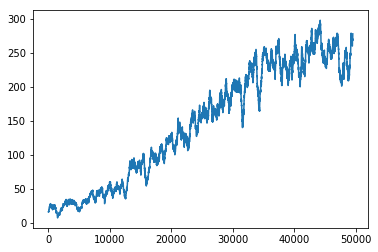

In [116]:
x,N = rList, 500
plt.plot(np.convolve(x, np.ones((N,)), mode='valid'))

### Original code

In [24]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 1000
#create lists to contain total rewards and steps per episode
#jList = []
rList = []
for i in range(num_episodes):
    #Reset environment and get first new observation
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        j+=1
        #Choose an action by greedily (with noise) picking from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state and reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    #jList.append(j)
    rList.append(rAll)
    
print "Score over time: " +  str(sum(rList)/num_episodes)

Score over time: 0.412


Ok, so about half.

In [ ]:
nums = [2,2,2,3,4];
target = 7

for 